In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv('D:\\Colorado State University\\Capstone Project\\Module 6\\capstone_data.csv')



In [2]:
# Split the data into features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Get the importance of each feature
importance = pd.DataFrame({'Feature': X.columns, 'Importance': logreg.coef_[0]})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)


                          Feature  Importance
19              FastingBloodSugar    1.921289
20                          HbA1c    1.770504
30              FrequentUrination    0.604802
16                   Hypertension    0.557470
31                ExcessiveThirst    0.481983
32          UnexplainedWeightLoss    0.292886
34                  BlurredVision    0.268073
35               SlowHealingSores    0.176104
12          FamilyHistoryDiabetes    0.149717
40                   WaterQuality    0.128228
26       CholesterolTriglycerides    0.114235
18                    DiastolicBP    0.094200
7                         Smoking    0.088075
2                          Gender    0.085217
6                             BMI    0.079634
4             SocioeconomicStatus    0.065225
42            MedicationAdherence    0.063131
50                          SES_2    0.058536
22                      BUNLevels    0.058189
9                PhysicalActivity    0.057364
5                  EducationLevel 

Training Advanced Models

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train a Support Vector Machine Classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Function to evaluate the model
def evaluate_model(model, X_test_scaled, y_test):
    predictions = model.predict(X_test_scaled)
    probabilities = model.predict_proba(X_test_scaled)[:, 1]
    print(classification_report(y_test, predictions))
    print("AUC-ROC:", roc_auc_score(y_test, probabilities))

# Evaluate SVM
print("SVM Performance:")
evaluate_model(svm, X_test_scaled, y_test)

# Evaluate Random Forest
print("Random Forest Performance:")
evaluate_model(rf, X_test_scaled, y_test)


SVM Performance:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       347
           1       0.79      0.75      0.77       217

    accuracy                           0.83       564
   macro avg       0.82      0.81      0.82       564
weighted avg       0.83      0.83      0.83       564

AUC-ROC: 0.9056162764445743
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       347
           1       0.94      0.80      0.86       217

    accuracy                           0.90       564
   macro avg       0.91      0.88      0.89       564
weighted avg       0.91      0.90      0.90       564

AUC-ROC: 0.9658428398783516


Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

# X is the feature matrix and y is the target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now train the models on the X_train and y_train datasets and evaluate them on X_test and y_test


Cross-Validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Using RandomForest as an example
model = RandomForestClassifier(random_state=42)
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validated scores:", scores)
print("Average score:", scores.mean())


Cross-validated scores: [0.91755319 0.92021277 0.94414894 0.93617021 0.768     ]
Average score: 0.8972170212765957


Hyperparameter Tuning for Random Forest

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid correctly
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Corrected to include only valid options
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForest model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit grid_search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
Best score:  0.9664184005060283


Implementing k-Fold Cross-Validation with ROC-AUC Calculation

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

# Setup 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

# Use the best parameters from the grid search to setup the RandomForest model
model = RandomForestClassifier(**grid_search.best_params_, random_state=42)

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model.fit(X_train_kf, y_train_kf)
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test_kf)[:, 1]
    
    # Calculate and append the ROC-AUC for the current fold
    roc_auc = roc_auc_score(y_test_kf, y_pred_proba)
    roc_auc_scores.append(roc_auc)

# Print ROC-AUC scores from each fold and the average
print("K-Fold ROC AUC scores:", roc_auc_scores)
print("Average ROC AUC score:", np.mean(roc_auc_scores))


K-Fold ROC AUC scores: [0.970077133167262, 0.9854788999525841, 0.964076161988035, 0.9658508158508158, 0.9767230405528279]
Average ROC AUC score: 0.9724412103023049


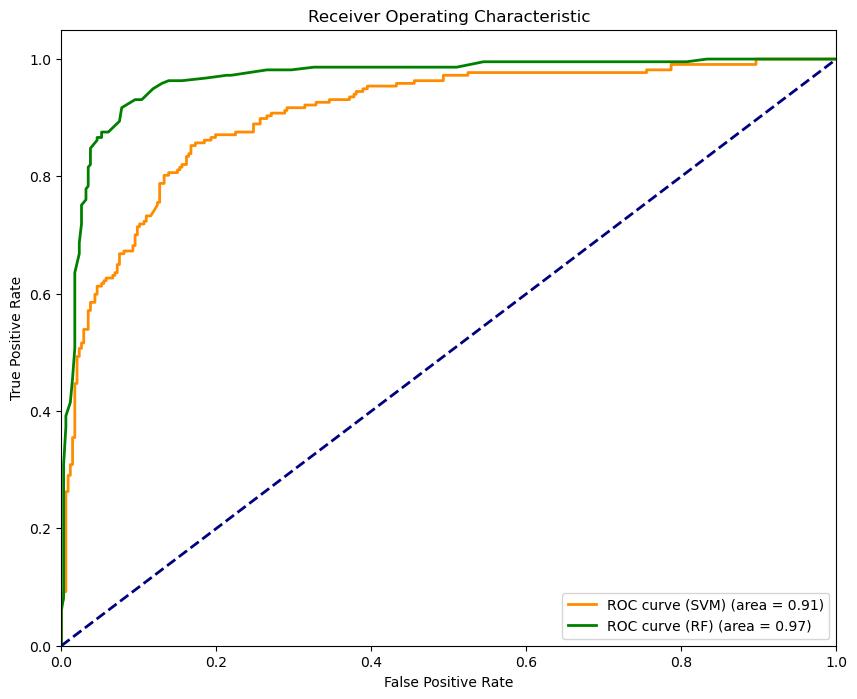

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Checking if models are fitted
if not hasattr(svm, 'classes_'):
    svm.fit(X_train_scaled, y_train)
if not hasattr(rf, 'classes_'):
    rf.fit(X_train_scaled, y_train)

# Generate probabilities for SVM
svm_probabilities = svm.predict_proba(X_test_scaled)[:, 1]

# Generate probabilities for Random Forest
rf_probabilities = rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probabilities)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (SVM) (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (RF) (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


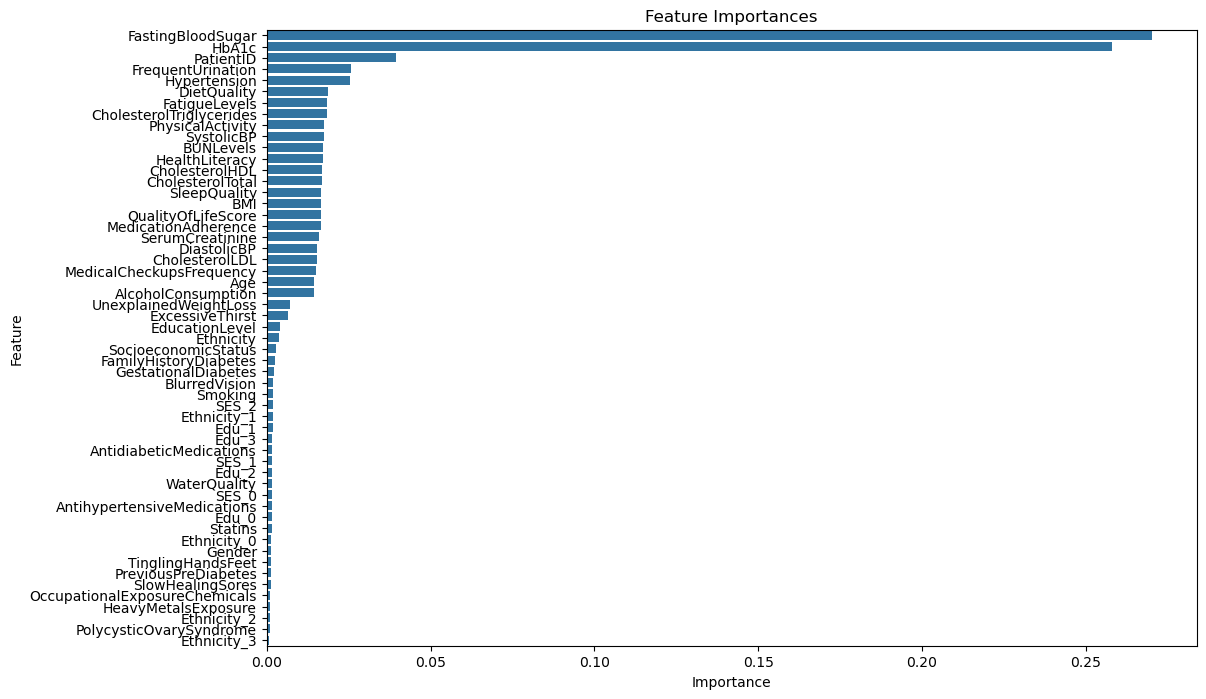

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is our trained RandomForestClassifier
feature_importances = pd.DataFrame({'Feature': df.drop('Diagnosis', axis=1).columns, 
                                    'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()
